In [2]:
import numpy as np
import pandas as pd
import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
stocks=input("Enter the stock symbols separated by commas: ")
data=yf.download(stocks, "2008-01-01", "2021-01-18",auto_adjust=True)
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,7.572,7.876,7.564,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,56675
2008-01-08,7.909,7.997,7.880,7.967,53775


In [13]:
print(data.shape)

(3282, 5)


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3282 entries, 2008-01-02 to 2021-01-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3282 non-null   float64
 1   High    3282 non-null   float64
 2   Low     3282 non-null   float64
 3   Close   3282 non-null   float64
 4   Volume  3282 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.8 KB


In [6]:
data.describe()

,Open,High,Low,Close,Volume
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000
mean,3.713705,3.787288,3.635038,3.707074,131397.603595
std,1.830425,1.865744,1.789584,1.825297,54393.040171
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.691250,2.736500,2.644000,2.693000,91744.250000
50%,3.253000,3.312000,3.183500,3.240500,126669.500000
75%,4.157750,4.244750,4.066750,4.152000,161490.500000
max,13.580000,13.694000,13.306000,13.577000,459196.000000


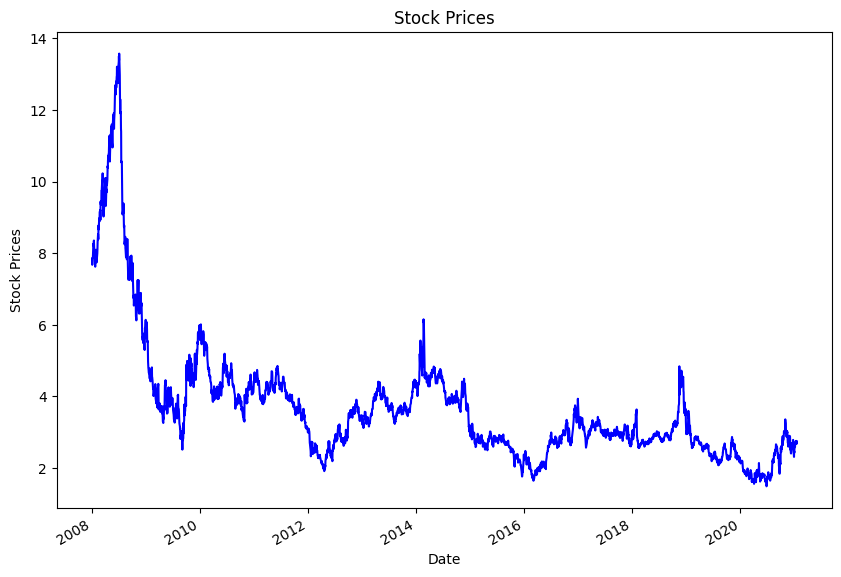

In [11]:
data.Close.plot(figsize=(10, 7),color='blue')
plt.ylabel("Stock Prices".format(stocks))
plt.title("Stock Prices".format(stocks))
plt.show()

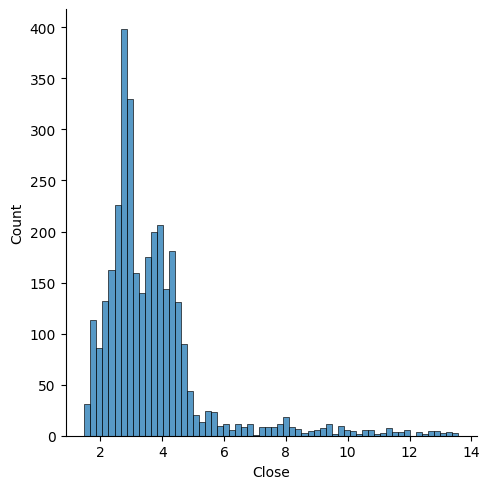

In [20]:
sns.displot(data['Close'])

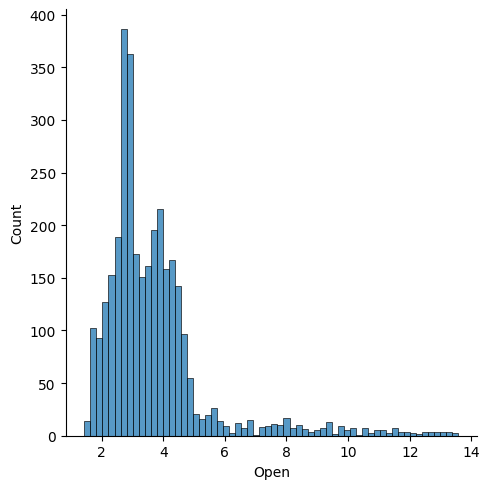

In [21]:
sns.displot(data['Open'])

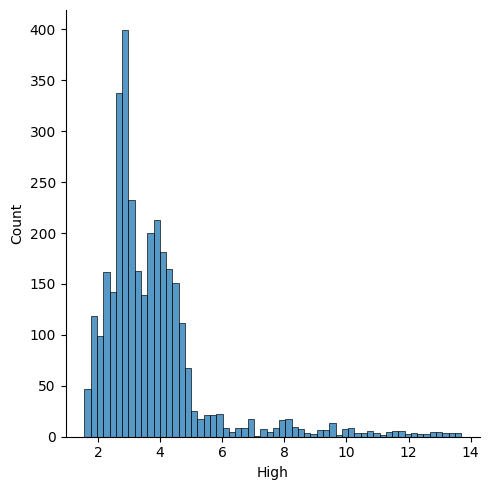

In [23]:
sns.displot(data['High'])

In [25]:
# Learning data in different models
# data is very non linear

X=data.drop('Close',axis=1)
y=data['Close']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X train data shape",X_train.shape)
print("X test data shape",X_test.shape)
print("y train data shape",y_train.shape)
print("y test data shape",y_test.shape)


X train data shape (2625, 4)
X test data shape (657, 4)
y train data shape (2625,)
y test data shape (657,)


In [26]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)

y_hat=lr.predict(X_test)

In [27]:
y_hat

array([ 3.83019219,  3.47313796,  2.87406809,  3.80620424,  2.57759868,
        2.232131  ,  2.85302805,  5.68208257,  3.67209084,  4.13720952,
        1.75062183,  5.82750476,  4.05391444,  5.48907306,  4.29216737,
        3.08202241,  2.52294158,  4.00205412,  2.49664994,  2.95594217,
        3.65201616,  3.37884446,  4.85117162,  3.91404267,  1.99344795,
       11.54530512,  2.89753604,  4.60487719,  3.05508498,  9.38751446,
        3.00451494,  5.46902223,  3.95916214, 11.25794985,  2.62246528,
        3.1543544 ,  2.26413496,  2.86784235,  2.94946557,  2.53538423,
        2.72384783,  2.29996489,  3.80163457,  2.96489309,  3.56885202,
        1.64711675,  2.81766265,  8.68958623,  3.92674805,  9.96303892,
        4.4981776 ,  2.10995805,  3.57998536,  1.85936209,  4.79595458,
        2.63365331,  2.95184353,  4.62054248,  4.40709762,  2.80338007,
        3.25846903,  1.64186774,  2.24837235,  3.89992431,  4.85842873,
        9.98057871,  6.82101452,  2.17894188,  3.8338919 ,  2.15

In [29]:
from sklearn.metrics import mean_squared_error,r2_score

def calcuulate_metrics(y_test,y_hat):
    mse=mean_squared_error(y_test,y_hat)
    rmse=np.sqrt(mse)
    r2=r2_score(y_test,y_hat)

    print("Mean Squared Error: ",mse)
    print("Root Mean Squared Error: ",rmse)
    print("R2 Score: ",r2)

calcuulate_metrics(y_test,y_hat)

Mean Squared Error:  0.001972836301429629
Root Mean Squared Error:  0.044416621904751256
R2 Score:  0.9994434122669321
